### Script contents:

#### 1. Importing libraries and data
#### 2. Subsetting, wrangling, & cleaning
#### 3. Time series analysis: Decomposition
#### 4. Testing for stationarity
#### 5. Stationarizing the data

### 1. Importing libraries and data

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

Registered for Quandl account during exercise portion of this task, however I had previoisly sourced the data set to be applied here during my initial search.

In [2]:
# Define path
path = r'C:\Users\Jay\Documents\UFO Sightings Analysis'

In [3]:
# Import "meteorite-landings" data set
df = pd.read_csv(os.path.join(path, '02 Data Sets', 'Prepared Data', 'meteorite-landings-scrubbed.csv'))

In [4]:
df.head(5)

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Chelyabinsk,57165,Valid,LL5,100000.0,Fell,2013,54.817,61.117,"(54.816670, 61.116670)"
1,Jiddat al Harasis 799,57428,Valid,LL6,212.0,Found,2012,19.773,56.390,"(19.772780, 56.389820)"
2,Ksar Ghilane 011,55606,Valid,L4,25.6,Found,2012,32.891,9.913,"(32.891000, 9.913000)"
3,Ksar Ghilane 010,55605,Valid,L5,50.1,Found,2012,32.806,9.833,"(32.806000, 9.833000)"
4,Northwest Africa 7496,56314,Valid,Eucrite-pmict,788.4,Found,2012,22.948,-13.385,"(22.947810, -13.385270)"


In [5]:
df.columns

Index(['name', 'id', 'nametype', 'recclass', 'mass', 'fall', 'year', 'reclat',
       'reclong', 'GeoLocation'],
      dtype='object')

In [6]:
type(df)

pandas.core.frame.DataFrame

In [7]:
df.shape

(31689, 10)

### 2. Subsetting, wrangling, & cleaning

In [8]:
# Create data frame with only variables for use with time series
df_t = df[['year', 'mass']]
df_t.head()

,year,mass
0,2013,100000.0
1,2012,212.0
2,2012,25.6
3,2012,50.1
4,2012,788.4


In [9]:
df_t.dtypes

year      int64
mass    float64
dtype: object

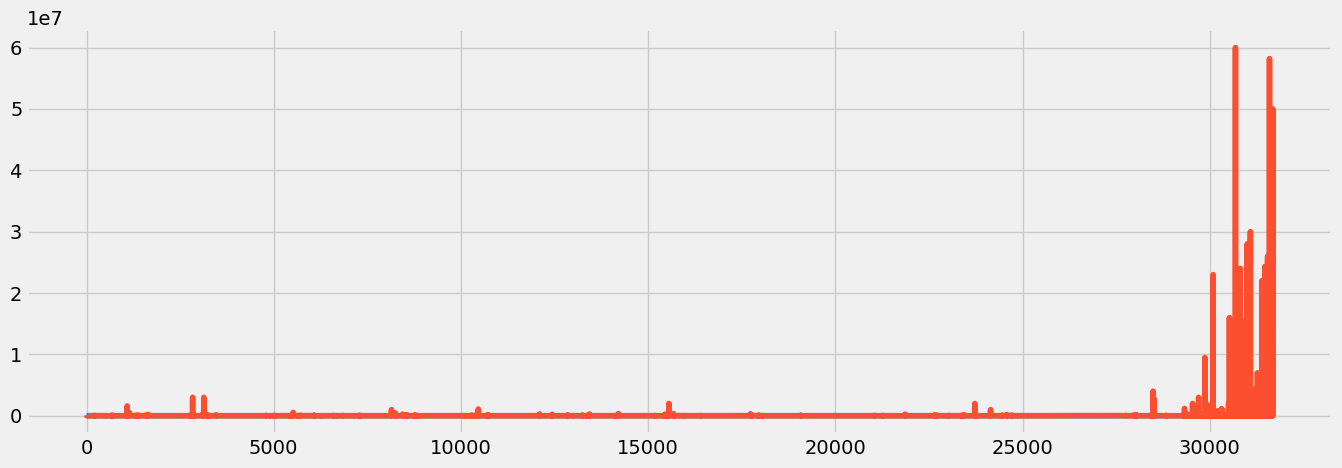

In [10]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!

plt.plot(df_t)

In [11]:
# Create subset to align with date range in primary data set
data = df_t.loc[(df_t['year'] >= 1906) & (df_t['year'] < 2015)]

##### In preparation to merge with UFO data, removed dates prior to 1906 and after 2014.

In [12]:
data.shape

(30898, 2)

In [13]:
data.head()

,year,mass
0,2013,100000.0
1,2012,212.0
2,2012,25.6
3,2012,50.1
4,2012,788.4


Reverting back to example data for this task, as all of the applicable variables in current project data are too random, therefore not suitable for stationarizing and forecasting a time series.